In [127]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
data = pd.read_csv('../dataset/avito_voitures 18.csv', 
                   sep=',', 
                   on_bad_lines='skip') 
data.columns = data.columns.str.replace(' ', '_')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18893 entries, 0 to 18892
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Titre              18893 non-null  object 
 1   Prix               14057 non-null  object 
 2   Date_d'ajout       18893 non-null  object 
 3   Localisation       18893 non-null  object 
 4   Annee              18829 non-null  object 
 5   Auto_manuel        18829 non-null  object 
 6   Carburant          18829 non-null  object 
 7   Type               14321 non-null  object 
 8   Secteur            14321 non-null  object 
 9   Kilomtrage         14321 non-null  object 
 10  Marque             14321 non-null  object 
 11  Module             14321 non-null  object 
 12  Nombre_de_portes   14321 non-null  float64
 13  Origine            14321 non-null  object 
 14  Première_main      14321 non-null  object 
 15  Puissance_fiscale  14321 non-null  object 
 16  Eat                143

In [128]:
# Supprimer les lignes dupliquées
before = data.shape[0]
data = data.drop_duplicates()
after = data.shape[0]
print(before)
print(after)

18893
18103


In [129]:
# GESTION DES VALEURS MANQUANTES

# le traitement de la column prix 
# Nettoyage de la colonne Prix
data['Prix'] = data['Prix'].astype(str).str.replace('DH', '', regex=False)
data['Prix'] = data['Prix'].str.replace(' ', '', regex=False)
data['Prix'] = pd.to_numeric(data['Prix'], errors='coerce')  # Remplace les erreurs par NaN
data['Prix'] = data['Prix'].fillna(data['Prix'].median()) # Remplacer les vals manquantes par la mediane
# print(data['Prix'].isnull().sum())

# Nettoyage de la coloumn annee
data['Annee'] = pd.to_numeric(data['Annee'], errors='coerce')
data['Annee']= data['Annee'].fillna(data['Annee'].median()) # Remplacer les vals manquantes par la mediane
# print(data['Annee'].isnull().sum())

# Nettoyage de la coloumn Auto Manuelle
data['Auto_manuel']= data['Auto_manuel'].fillna(data['Auto_manuel'].mode()[0])
# print(data['Auto_manuel'].isnull().sum())

# Nettoyage de la coloumn Carburant
data['Carburant']= data['Carburant'].fillna(data['Carburant'].mode()[0])
# print(data['Carburant'].isnull().sum())

# Nettoyage de la coloumn Type
data['Type']= data['Type'].fillna(data['Type'].mode()[0])
# print(data['Type'].isnull().sum())

# Nettoyage de la coloumn Secteur
data['Secteur']= data['Secteur'].fillna(data['Secteur'].mode()[0])
# print(data['Secteur'].isnull().sum())

# Nettoyage de la coloumn Kilomtrage
data['Kilomtrage'] = data['Kilomtrage'].astype(str).str.replace(' ', '', regex=True)
# Séparer en deux colonnes SI la valeur contient '-'
kilomtrage_split = data['Kilomtrage'].str.split('-', expand=True)
if kilomtrage_split.shape[1] == 1:
    kilomtrage_split[1] = kilomtrage_split[0]  # Si pas de '-', on met la même valeur
# Convertir en nombres
kilomtrage_split = kilomtrage_split.apply(pd.to_numeric, errors='coerce')
# Calculer la moyenne et remplacer dans le DataFrame
data['Kilomtrage'] = kilomtrage_split.mean(axis=1)
# Remplacer les valeurs NaN par la médiane
data['Kilomtrage'] = data['Kilomtrage'].fillna(data['Kilomtrage'].median())
# print(data['Kilomtrage'].isnull().sum())
# print(data['Kilomtrage'])

# Nettoyage de la coloumn Marque
data['Marque']= data['Marque'].fillna(data['Marque'].mode()[0])
# print(data['Marque'].isnull().sum())

# Nettoyage de la coloumn Module
data['Module']= data['Module'].fillna(data['Module'].mode()[0])
# print(data['Module'].isnull().sum())

# Nettoyage de la coloumn Nombre_de_portes
data['Nombre_de_portes']= data['Nombre_de_portes'].fillna(data['Nombre_de_portes'].median())
# print(data['Module'].isnull().sum())

# Nettoyage de la coloumn Origine
data['Origine']= data['Origine'].fillna(data['Origine'].mode()[0])
# print(data['Origine'].isnull().sum())

# Nettoyage de la coloumn Première_main
data['Première_main']= data['Première_main'].fillna(data['Première_main'].mode()[0])
# print(data['Première_main'].isnull().sum())

# Nettoyage de la coloumn Puissance_fiscale
data['Puissance_fiscale'] = data['Puissance_fiscale'].astype(str).str.replace('CV', '', regex=False)
data['Puissance_fiscale'] = data['Puissance_fiscale'].str.replace(' ', '', regex=False)
data['Puissance_fiscale'] = pd.to_numeric(data['Puissance_fiscale'], errors='coerce') 
data['Puissance_fiscale']= data['Puissance_fiscale'].fillna(data['Puissance_fiscale'].median())
# print(data['Première_main'].isnull().sum())

# Nettoyage de la coloumn Eat
data['Eat']= data['Eat'].fillna(data['Eat'].mode()[0])
# print(data['Première_main'].isnull().sum())

# Afficher le nombre de valeurs manquantes par colonne
print(data.isnull().sum())



Titre                0
Prix                 0
Date_d'ajout         0
Localisation         0
Annee                0
Auto_manuel          0
Carburant            0
Type                 0
Secteur              0
Kilomtrage           0
Marque               0
Module               0
Nombre_de_portes     0
Origine              0
Première_main        0
Puissance_fiscale    0
Eat                  0
dtype: int64


In [130]:
from sklearn.preprocessing import LabelEncoder

# Liste des colonnes catégorielles à encoder
categorical_cols = ['Localisation', 'Auto_manuel', 'Carburant', 'Type', 'Secteur', 
                     'Marque', 'Module', 'Origine', 'Première_main', 'Eat']

# Initialiser un dictionnaire pour stocker les encodeurs (utile si tu veux les réutiliser plus tard)
label_encoders = {}

# Appliquer LabelEncoder à chaque colonne catégorielle
for col in categorical_cols:
    if col in data.columns:  # Vérifier si la colonne existe dans les données
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))  # Transformation des catégories en valeurs numériques
        label_encoders[col] = le  # Garder l’encodeur pour une utilisation future
    else:
        print(f"Colonne '{col}' non trouvée dans le DataFrame.")

# Affichage des premières lignes après encodage
print(data.head())


                                               Titre      Prix  \
0              Passat Diesel 2011 immatriculée Rabat  130000.0   
1                                  volkswagen tiguan  320000.0   
2    Land Rover Range Rover Sport Diesel Automatique  345000.0   
3  Dacia Duster Diesel Automatique 2021 à Casablanca  159000.0   
4                        toyota corolla hybride neuf  206000.0   

        Date_d'ajout  Localisation   Annee  Auto_manuel  Carburant  Type  \
0      il y a 1 jour             0  2011.0            1          0     0   
1      il y a 1 jour             0  2022.0            0          0     0   
2  il y a 10 minutes             0  2014.0            0          0     0   
3  il y a 18 minutes             0  2021.0            0          0     0   
4  il y a 19 minutes             0  2021.0            0          3     0   

   Secteur  Kilomtrage  Marque  Module  Nombre_de_portes  Origine  \
0       13    104999.5      70     190               5.0        3   
1       

In [131]:
import numpy as np

# Colonnes à transformer
# log_cols = ['Prix']
log_columns=['Prix']

# Appliquer la transformation log1p (log(x + 1)) pour gérer les zéros
for col in log_columns:
    data[col] = np.log1p(data[col])

# Vérification rapide
print(data[log_columns].head())

        Prix
0  11.775297
1  12.676079
2  12.751303
3  11.976666
4  12.235636


In [132]:
# Exemple de DataFrame
df = pd.DataFrame(data)  # Utiliser votre DataFrame ici

# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculer le premier (Q1) et troisième (Q3) quartile pour chaque colonne numérique
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Calculer l'écart interquartile (IQR)
IQR = Q3 - Q1

# Filtrer les lignes qui ne sont pas des outliers
df_cleaned = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

# Afficher le DataFrame nettoyé
print(df_cleaned.head())  


                                               Titre       Prix  \
0              Passat Diesel 2011 immatriculée Rabat  11.775297   
1                                  volkswagen tiguan  12.676079   
3  Dacia Duster Diesel Automatique 2021 à Casablanca  11.976666   
4                        toyota corolla hybride neuf  12.235636   
5                   jeep renegade 23 diesel 6ch neuf  12.235636   

        Date_d'ajout  Localisation   Annee  Auto_manuel  Carburant  Type  \
0      il y a 1 jour             0  2011.0            1          0     0   
1      il y a 1 jour             0  2022.0            0          0     0   
3  il y a 18 minutes             0  2021.0            0          0     0   
4  il y a 19 minutes             0  2021.0            0          3     0   
5  il y a 19 minutes             0  2023.0            1          0     0   

   Secteur  Kilomtrage  Marque  Module  Nombre_de_portes  Origine  \
0       13    104999.5      70     190               5.0        3   
1 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Sélectionner toutes les colonnes numériques sauf "Prix"
cols_to_scale = data.select_dtypes(include=['float64']).columns.drop('Prix')
cols_to_scale = ['Kilomtrage', 'Annee', 'Puissance_fiscale', 'Nombre_de_portes']

# Appliquer le scaling uniquement sur ces colonnes
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# Vérification
print(data[cols_to_scale])
  

[0]	validation_0-rmse:0.46308	validation_1-rmse:0.46572
[100]	validation_0-rmse:0.31899	validation_1-rmse:0.33393
[200]	validation_0-rmse:0.27993	validation_1-rmse:0.30202
[300]	validation_0-rmse:0.27051	validation_1-rmse:0.29479
[400]	validation_0-rmse:0.26757	validation_1-rmse:0.29272
[500]	validation_0-rmse:0.26642	validation_1-rmse:0.29199
[600]	validation_0-rmse:0.26605	validation_1-rmse:0.29183
[700]	validation_0-rmse:0.26590	validation_1-rmse:0.29176
[800]	validation_0-rmse:0.26572	validation_1-rmse:0.29170
[900]	validation_0-rmse:0.26560	validation_1-rmse:0.29168
[1000]	validation_0-rmse:0.26553	validation_1-rmse:0.29166
[1100]	validation_0-rmse:0.26549	validation_1-rmse:0.29164
[1200]	validation_0-rmse:0.26544	validation_1-rmse:0.29163
[1300]	validation_0-rmse:0.26543	validation_1-rmse:0.29163
[1400]	validation_0-rmse:0.26541	validation_1-rmse:0.29164
[1500]	validation_0-rmse:0.26538	validation_1-rmse:0.29162
[1600]	validation_0-rmse:0.26534	validation_1-rmse:0.29161
[1699]	va

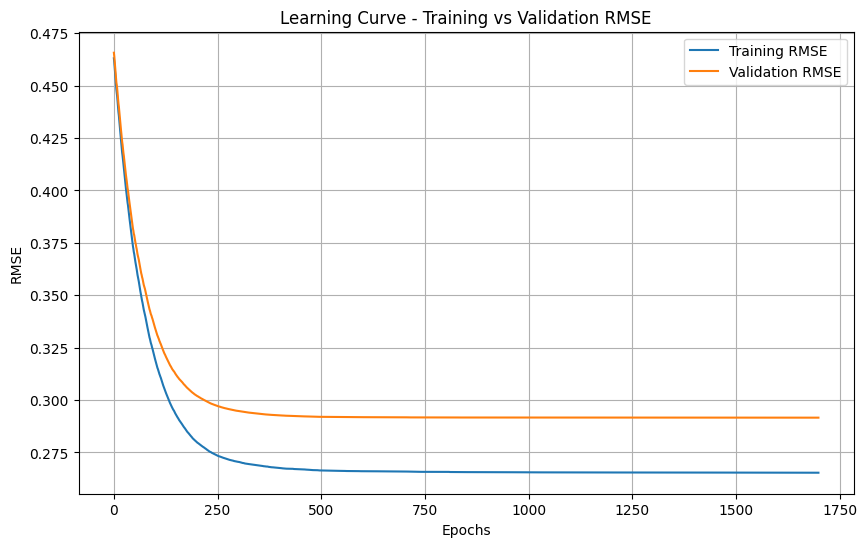

In [134]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Charger les données
df = pd.DataFrame(df_cleaned)

categorical_cols = ['Marque', 'Module', 'Auto_manuel', 'Carburant', 'Eat']
numerical_cols = ['Kilomtrage', 'Annee', 'Puissance_fiscale', 'Nombre_de_portes']
    # Définir les caractéristiques et la variable cible
X = df[categorical_cols + numerical_cols]
y = df["Prix"]

    # Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Meilleurs hyperparamètres trouvés
best_params = {
    'n_estimators': 1700,
    'learning_rate': 0.01,
    'max_depth': 100,
    'min_child_weight': 6,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    'gamma': 0.2,
    'reg_alpha': 0.5,
    'reg_lambda': 2,
    'max_delta_step': 1,
    'objective': 'reg:squarederror',
    'random_state': 42
}
    # Modèle XGBoost avec les meilleurs paramètres
model = xgb.XGBRegressor(**best_params)

    # Entraînement du modèle sans early stopping
    # Entraînement du modèle sans early stopping
model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)  # No need for eval_metric


    # Prédictions sur les données de test
y_pred = model.predict(X_test)
print("the prediction ", y_pred)

    # Évaluation
r2 = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

    # Affichage des performances
print("🔍 Évaluation du modèle XGBoost")
print(f"✅ Accuracy (R² Score)        : {r2:.2f}")
print(f"📉 Mean Absolute Error (MAE) : {mae:.2f}")
print(f"📉 Mean Squared Error (MSE)  : {mse:.2f}")
print(f"📉 Root Mean Squared Error   : {rmse:.2f}")

# Sauvegarde du modèle
joblib.dump(model, "../interface/model_xgb.joblib")
print("Modèle sauvegardé sous 'model_xgb.joblib'")

    # Plotting the learning curve
epochs = len(model.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, model.evals_result()['validation_0']['rmse'], label='Training RMSE')
plt.plot(x_axis, model.evals_result()['validation_1']['rmse'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Learning Curve - Training vs Validation RMSE')
plt.legend()
plt.grid(True)
plt.show()


- Test

In [135]:
# import pandas as pd
# import numpy as np

# model_imported = joblib.load("model_xgb.joblib")
# joblib.dump(label_encoders, "../interface/labelEncoder.joblib")

# # Exemple de test brut
# test_data = pd.DataFrame([{
#     'Marque': 'Volkswagen',
#     'Module': 'Tiguan',
#     'Kilomtrage': '100000',
#     'Annee': 2022,
#     'Puissance_fiscale': 8,
#     'Auto_manuel': 'Automatique',
#     'Carburant': 'Diesel',
#     'Nombre_de_portes': 5,
#     'Eat': 'Excellent'
# }])

# # Colonnes à encoder
# categorical_cols = ['Marque', 'Module', 'Auto_manuel', 'Carburant', 'Eat']

# # Utiliser les encodeurs déjà entraînés
# for col in categorical_cols:
#     test_data[col] = label_encoders[col].transform(test_data[col])

# # Standardisation des colonnes numériques (même scaler que l'entraînement)

# # Prédiction
# predicted_log_price = model_imported.predict(test_data)
# predicted_price = np.expm1(predicted_log_price)  # Inverse de log1p

# print(f"💰 Prix estimé pour cette voiture : {predicted_price[0]} DH")
